In [7]:
from matplotlib import pyplot as plt
import cv2 # used for resize. if you dont have it, use anything else
import numpy as np
from model import Deeplabv3


## Load Image 

In [21]:
################################
sample_img = 'image1.jpg'
################################


img = cv2.imread('./imgs/' + sample_img)

w, h, _ = img.shape
ratio = 512. / np.max([w,h])


""" Resizing """
resized = cv2.resize(img,(int(ratio*h),int(ratio*w)))
resized = resized / 127.5 - 1.
pad_x = int(512 - resized.shape[0])
resized2 = np.pad(resized,((0,pad_x),(0,0),(0,0)), mode='constant')



## Load Model

In [22]:

deeplab_model = Deeplabv3()
# deeplab_model = Deeplabv3(input_shape=(512,512,1), classes=2) 

## Predict

In [23]:
res = deeplab_model.predict(np.expand_dims(resized2,0))
labels = np.argmax(res.squeeze(),-1)

## Display Reuslt 

[]

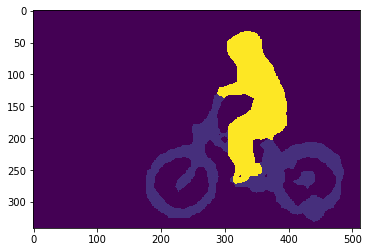

In [24]:
plt.imshow(labels[:-pad_x])
plt.plot()